In [1]:
#Importing necessary libraries for EDA 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
#Reading the dataset
df  = pd.read_csv(r"C:\Users\tanya\Downloads\Augmented_Car_Data.csv")
print('Head of the dataset:')
df.head()
df.describe()
print("Shape of dataset is:", df.shape)

Head of the dataset:
Shape of dataset is: (10010, 13)


In [3]:
#Checking datatypes and missing values
print('The data type of each column is:', df.dtypes)
print('Number of null values in each column are:', df.isnull().sum())

The data type of each column is: name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object
Number of null values in each column are: name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          279
engine           279
max_power        272
torque           280
seats            279
dtype: int64


In [4]:
#There is data inconsistency in the column 'Owner'. Some of the data has 'owner' at the end and some don't.
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [5]:
# Display unique values in the 'owner' column before cleaning
print("Unique values in the 'owner' column before cleaning:")
print(df['owner'].unique())

Unique values in the 'owner' column before cleaning:
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [6]:
# Function to ensure 'Owner' is present in each entry
def standardize_owner(entry):
    if pd.notna(entry):
        if 'Owner' not in entry:
            return f"{entry.strip()} Owner"
    return entry

# Apply the function to standardize the 'owner' column
df['owner'] = df['owner'].apply(standardize_owner)

In [7]:
print("\nUnique values in the 'owner' column after cleaning:")
print(df['owner'].unique())


Unique values in the 'owner' column after cleaning:
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car Owner']


In [8]:
#Dropping column 'Torque'
df.drop('torque', axis = 1, inplace = True)

In [9]:
#The missing valuesare less than 20% therefore, we can drop it.
df.dropna(inplace = True)

## VISUALIZATION

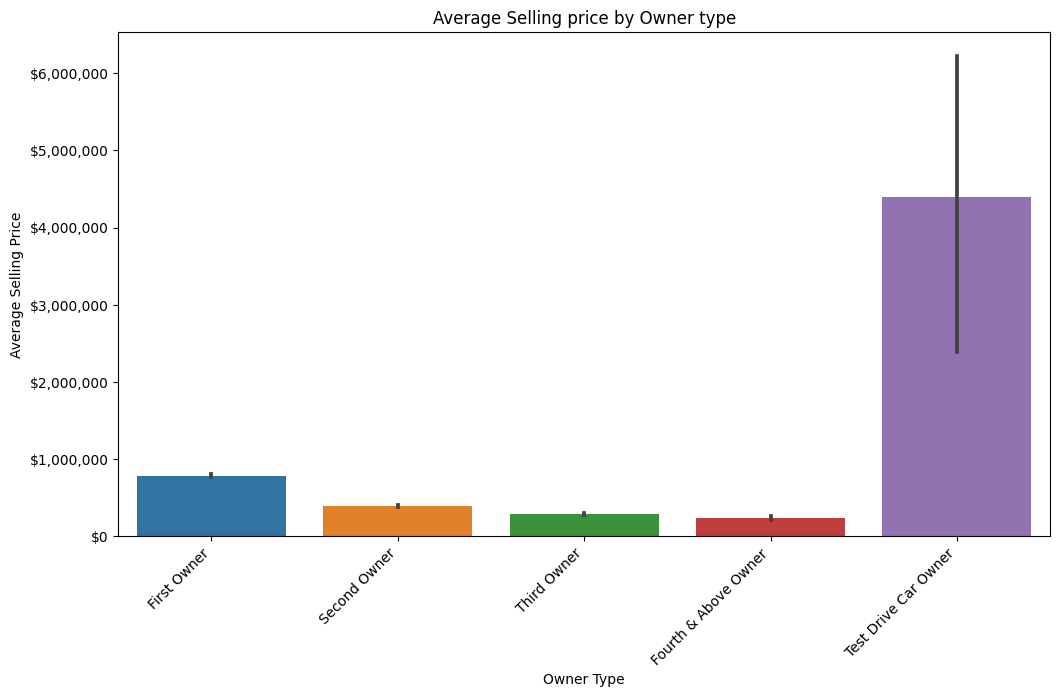

In [10]:
#Average Selling price of cars by owners

from matplotlib.ticker import FuncFormatter

plt.figure(figsize = (10,6))
sns.barplot(x = 'owner', y = 'selling_price', data = df)
plt.title('Average Selling price by Owner type')
plt.xlabel('Owner Type')
plt.ylabel('Average Selling Price')
plt.tight_layout()

#Adjusting the x axis labels to avoid overlapping

plt.xticks(rotation = 45, ha = 'right')

# Formatting y axis labels
def format_price_ticks(value,_):
    return f'${value:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))

plt.show()

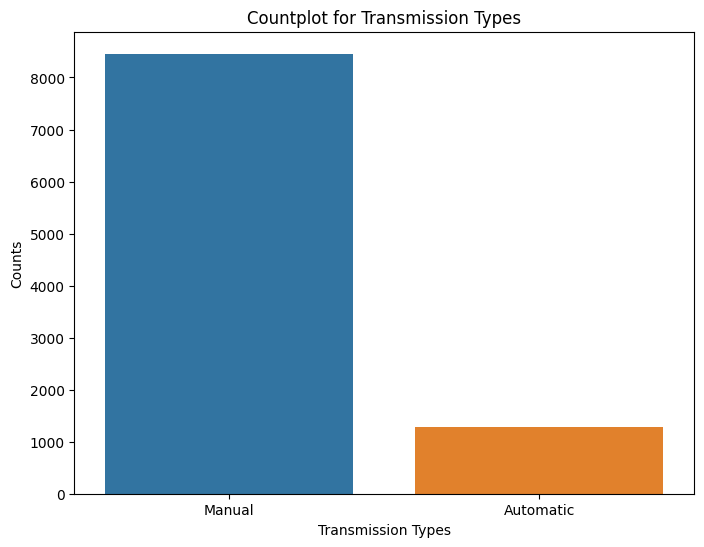

In [11]:
#Count Plot for transmission
plt.figure(figsize = (8,6))
sns.countplot(x = 'transmission', data = df)
plt.title('Countplot for Transmission Types')
plt.xlabel('Transmission Types')
plt.ylabel('Counts')
plt.show()

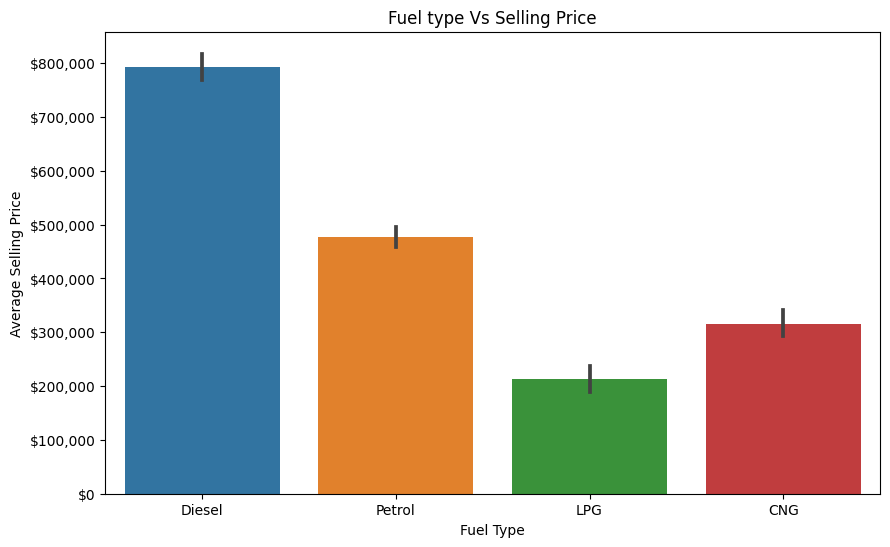

In [12]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'fuel', y ='selling_price', data = df)
plt.title('Fuel type Vs Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')

#Formatting y label ticks
def format_price_ticks(value, _):
    return f'${value:,.0f}'
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))

plt.show()

In [13]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

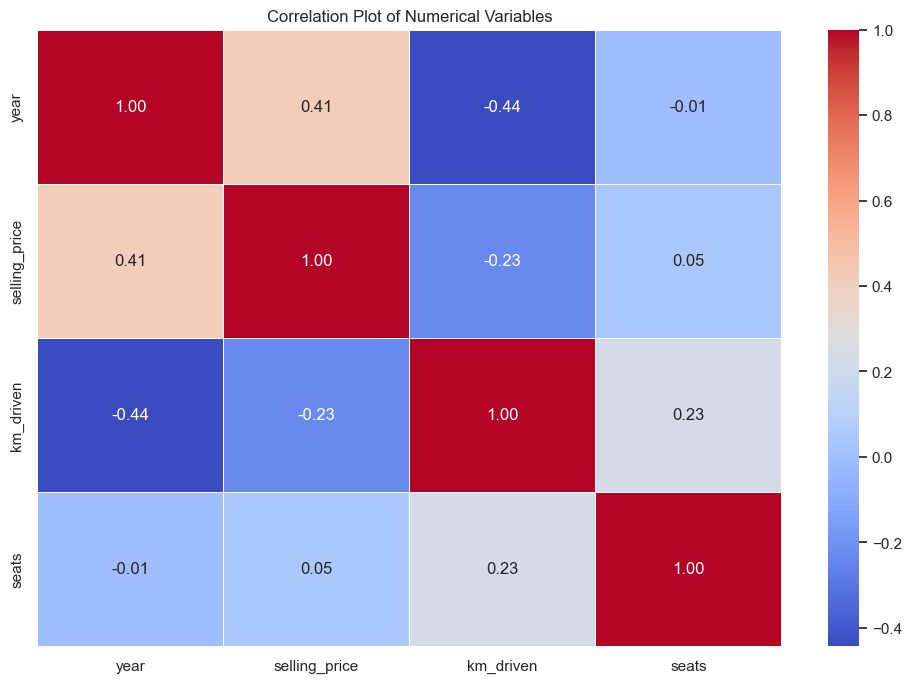

In [14]:
# Create a correlation heatmap
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set the style for seaborn
sns.set(style="white")

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Plot of Numerical Variables')
plt.show()

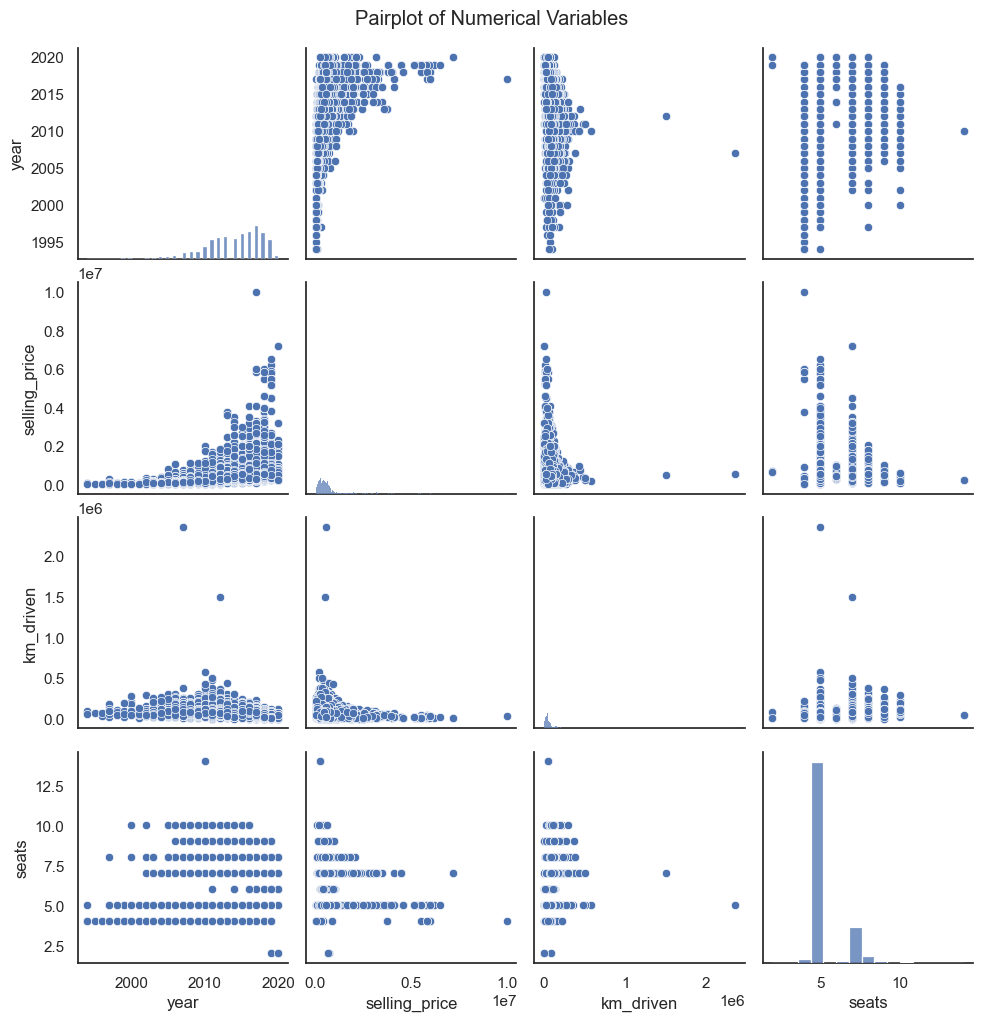

In [15]:
# Pair plot for numerical variables
numerical_vars = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
sns.pairplot(df[numerical_vars])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

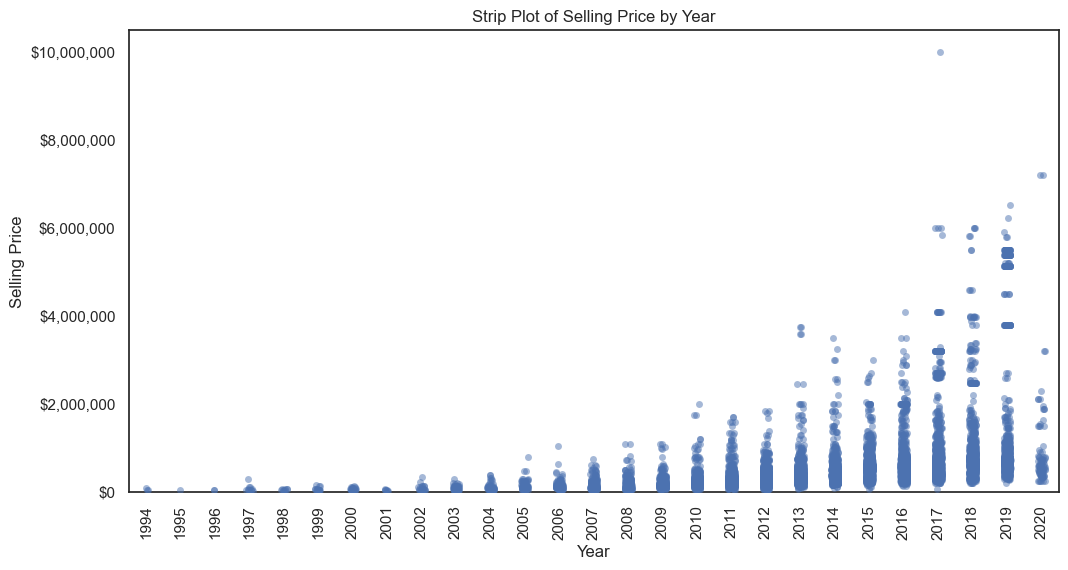

In [16]:
# Strip plot with jitter for 'year' vs. 'selling_price'
plt.figure(figsize=(12, 6))
sns.stripplot(x='year', y='selling_price', data=df, jitter=True, alpha=0.5)

# Formatting y-axis tick labels as our data's selling price values
def format_price_ticks(value, _):
    return f'${value:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_price_ticks))

# Setting y-axis limits
plt.ylim(bottom=0)

plt.title('Strip Plot of Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')

plt.xticks(rotation=90)
plt.show()

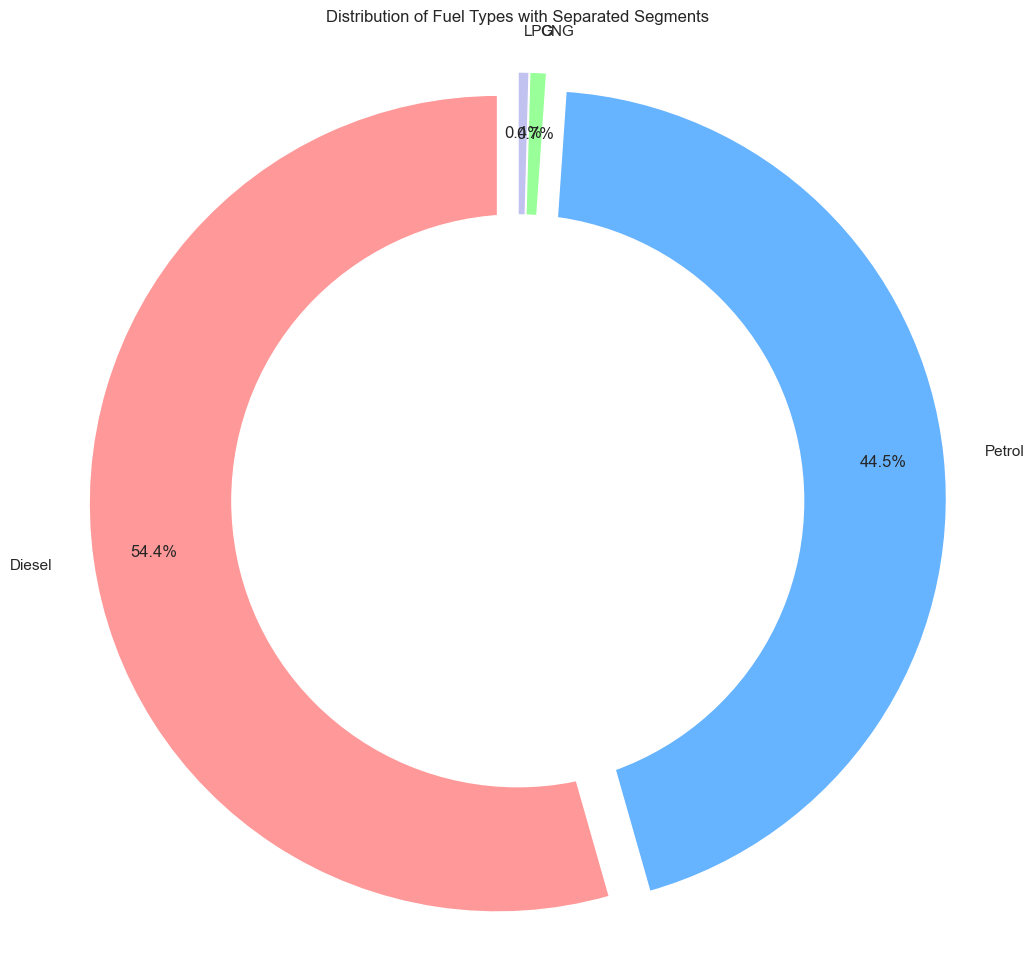

In [17]:
# Assuming df is the DataFrame and 'fuel' is the column of interest
fuel_counts = df['fuel'].value_counts()

# Set the explode value for each segment (small separation)
explode_values = [0.05] * len(fuel_counts)

# Create a pie chart with adjustments
plt.figure(figsize=(12, 12))  # Increased figure size
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0', '#ffb3e6'], 
        explode=explode_values, pctdistance=0.85)

# Draw a circle at the center of pie to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')  

plt.title('Distribution of Fuel Types with Separated Segments')
plt.show()



In [18]:
## How does the fuel type affect the pricing of used cars?

In [19]:
#creating a new dataframe dx 
dx = df

In [20]:
## preprocessing the data and running a Random Forest Regressor. 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import re


# Function to extract numeric values from strings
def extract_numeric(text):
    numeric = re.findall(r'\d+\.?\d*', str(text))
    return float(numeric[0]) if numeric else None

# Columns to convert from strings to numeric values
columns_to_convert = ['mileage', 'engine', 'max_power']

# Apply the extraction function to convert strings to numeric values in DataFrame
for col in columns_to_convert:
    dx[col] = dx[col].apply(extract_numeric)

# Define features and target variable
X = dx.drop('selling_price', axis=1)
y = dx['selling_price']

# Split the data into numeric and categorical features
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

# Apply transformations to numeric features using SimpleImputer
numeric_transformer = SimpleImputer(strategy='mean')

# Apply transformations to categorical features using OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Use ColumnTransformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit the preprocessor and transform the features
X_processed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['cat'] \
    .get_feature_names_out(categorical_features)

# Concatenate feature names (numeric and encoded categorical)
all_feature_names = numeric_features + list(feature_names)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training R2 Score: {train_score:.3f}")
print(f"Test R2 Score: {test_score:.3f}")



Training R2 Score: 0.996
Test R2 Score: 0.968


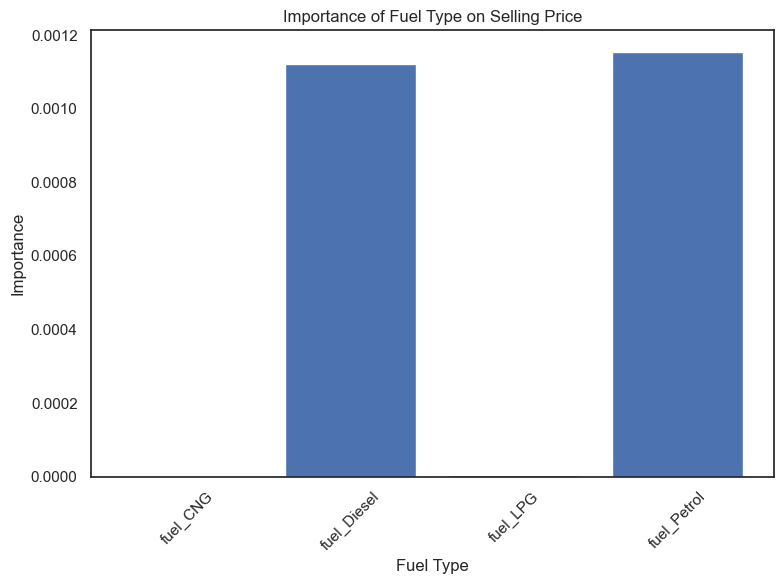

In [21]:
##performing feature importance and plotting the values

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': all_feature_names,
                                     'Importance': feature_importances})

# Filter for 'fuel' feature importance
fuel_importance = feature_importance_df[feature_importance_df['Feature'].str.startswith('fuel')]

# Plotting the importance of 'fuel' type
plt.figure(figsize=(8, 6))
plt.bar(fuel_importance['Feature'], fuel_importance['Importance'])
plt.title('Importance of Fuel Type on Selling Price')
plt.xlabel('Fuel Type')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
## Does the seller type (e.g., individual, dealer) have a noticeable impact on pricing?

In [23]:
##prepraing random forest model to check the impact of seller type
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
df['seller_type_label'] = label_encoder.fit_transform(df['seller_type'])

# Define features and target variable
features = ['year', 'km_driven', 'seller_type_label']  # Define features affecting pricing
target = 'selling_price'

# Split data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Assess feature importance
feature_importances = model.feature_importances_
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")


Mean Squared Error: 183804513789.8641
year: 0.3975845448688823
km_driven: 0.3962486546692171
seller_type_label: 0.20616680046190067


In [24]:
##using the results from the random forest model to do feature selection
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


# Encode 'seller_type' into numerical labels
label_encoder = LabelEncoder()
df['seller_type_label'] = label_encoder.fit_transform(df['seller_type'])

# Define features and target variable
features = ['year', 'km_driven', 'seller_type_label']  # Include 'seller_type_label' as a feature
target = 'selling_price'

# Split data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate R2 scores for training and test sets
train_score_2 = model.score(X_train, y_train)
test_score_2 = model.score(X_test, y_test)

print(f"Training R2 Score: {train_score_2:.3f}")
print(f"Test R2 Score: {test_score_2:.3f}")

# Assess feature importance, including 'seller_type_label'
feature_importances = model.feature_importances_
seller_type_importance = feature_importances[-1]  # Importance of 'seller_type_label'

# Evaluate the impact of seller type on pricing
if seller_type_importance > 0.01:  # Adjust the threshold as needed
    print("Seller type has a noticeable impact on pricing.")
else:
    print("Seller type does not have a significant impact on pricing.")


Training R2 Score: 0.815
Test R2 Score: 0.701
Seller type has a noticeable impact on pricing.


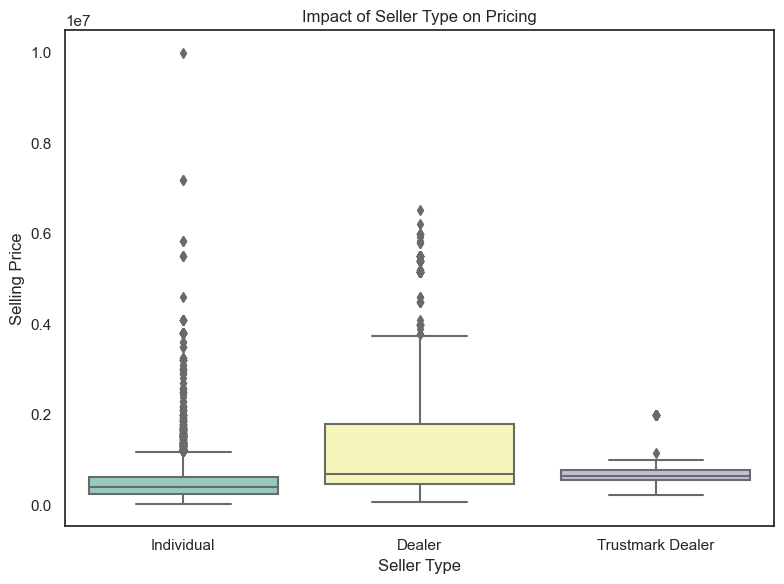

In [25]:
##using visualization to assess the impact of fuel pricing.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='seller_type', y='selling_price', data=df, palette='Set3')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Impact of Seller Type on Pricing')
plt.tight_layout()
plt.show()
